In [13]:
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   Departments            14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [16]:
## There are no NULL values in the data-set
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
Departments              0
salary                   0
left                     0
dtype: int64

In [17]:
print("Departments column : ",np.unique(df['Departments ']))
print("\nSalary column           : ",np.unique(df['salary']))

Departments column :  ['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']

Salary column           :  ['high' 'low' 'medium']


In [18]:
from sklearn import preprocessing

#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
df['salary']            = le.fit_transform(df['salary'])
df['Departments ']= le.fit_transform(df['Departments '])

In [19]:
print("Departments column : ",np.unique(df['Departments ']))
print("\nSalary column           : ",np.unique(df['salary']))

Departments column :  [0 1 2 3 4 5 6 7 8 9]

Salary column           :  [0 1 2]


In [20]:
## Splitting into dependent and independent variables
x = df.iloc[:,:-1] ## data-frame
y = df.iloc[:,-1]  ## series

In [21]:
## Splitting into train and test data
from sklearn.model_selection import train_test_split

## 30% test data and 70% train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [22]:
## Fitting into classifier model
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = gb.predict(x_test)

In [23]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
from sklearn.cluster import KMeans

km = KMeans(
     n_clusters=3, init='random',
     n_init=10, max_iter=100, 
     tol=1e-4, random_state=42
)

km.fit(x_train, y_train)

y_pred = km.predict(x_test)

print('Accuracy Score on test data: ',metrics.accuracy_score(y_test, y_pred))

Accuracy Score on test data:  0.26866666666666666


In [25]:
y_pred

array([3, 0, 3, ..., 2, 3, 3], dtype=int32)

In [26]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (2).

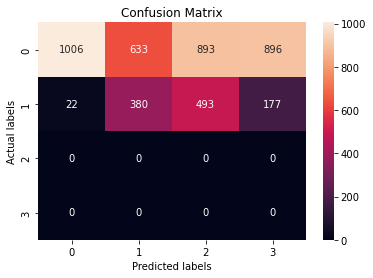

In [27]:
ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='g', ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels')
ax.set_title('Confusion Matrix')

ax.xaxis.set_ticklabels(['1', '0'])
ax.yaxis.set_ticklabels(['1', '0'])

plt.show()

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

Ideal: 0.151
> folds=2, accuracy=0.067 (0.014,0.120)
> folds=3, accuracy=0.156 (0.117,0.194)
> folds=4, accuracy=0.104 (0.042,0.132)
> folds=5, accuracy=0.163 (0.138,0.176)
> folds=6, accuracy=0.166 (0.136,0.201)
> folds=7, accuracy=0.166 (0.148,0.181)
> folds=8, accuracy=0.159 (0.131,0.202)
> folds=9, accuracy=0.155 (0.050,0.197)


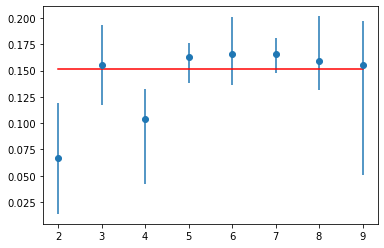

In [38]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
 
# create the dataset
def get_dataset(n_samples=100):
	X = df.iloc[:,:-1] ## data-frame
	y = df.iloc[:,-1]
	return X, y
 
# retrieve the model to be evaluate
def get_model():
	model = KMeans()
	return model
 
# evaluate the model using a given test condition
def evaluate_model(cv):
	# get the dataset
	X, y = get_dataset()
	# get the model
	model = get_model()
	# evaluate the model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return mean(scores), scores.min(), scores.max()
 
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut())
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,10)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
	# define the test condition
	cv = KFold(n_splits=k, shuffle=True, random_state=1)
	# evaluate k value
	k_mean, k_min, k_max = evaluate_model(cv)
	# report performance
	print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
	# store mean accuracy
	means.append(k_mean)
	# store min and max relative to the mean
	mins.append(k_mean - k_min)
	maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
pyplot.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
pyplot.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
pyplot.show()